In [1]:
import numpy as np

from hmm import GaussianHiddenMarkovModel
from scipy.stats import multivariate_normal
from scipy.stats import norm as univariate_normal
from scipy.stats import expon
from matplotlib.pyplot import imshow

num = 4
xs = np.repeat(np.arange(num), num)
ys = np.tile(np.arange(num), num)

states = np.array(list(zip(xs, ys)))
M = len(states)
state_ids = np.arange(M)

Definining the true probability distributions

In [2]:
def true_transition_probability(x, y):
    norm = np.linalg.norm(x - y, ord=1)
    if norm == 1:
        return 1/2
    elif norm == 0:
        return 1
    else:
        return 0

def true_initial_probability(x):
    return 1/states.shape[0]

true_mu = np.vstack(states)
true_sigma = np.stack(list(map(lambda x: np.eye(2), range(M))))

In [3]:
true_P = np.zeros((M, M))
for i in state_ids:
    for j in state_ids:
        true_P[i, j] = true_transition_probability(states[i], states[j])
true_P = true_P / np.sum(true_P, axis=1)[:, np.newaxis]

In [4]:
def simulate_observations(T):
    true_path = list()
    observations = list()
    state = np.random.choice(state_ids)
    observation = multivariate_normal.rvs(mean=true_mu[state, :], cov=true_sigma[state, :, :])
    true_path.append(states[state])
    observations.append(observation)
    for t in range(T-1):
        state = np.random.choice(state_ids, p=true_P[state, :])
        observation = multivariate_normal.rvs(mean=true_mu[state, :], cov=true_sigma[state, :, :])
        true_path.append(states[state])
        observations.append(observation)
    return true_path, observations

Defining initial guesses for the probability distributions

In [5]:
def transition_probability(x, y):
    norm = np.linalg.norm(x - y, ord=1)
    return univariate_normal.pdf(norm, loc=2, scale=1)

def initial_probability(x):
    return 1/states.shape[0]

mu = np.vstack(states)*2
sigma = np.stack(list(map(lambda x: np.eye(2)*0.5, range(M))))

In [6]:
hmm = GaussianHiddenMarkovModel(transition_probability, initial_probability, states, mu, sigma)

In [7]:
initial_P = hmm.P

In [8]:
import matplotlib.pyplot as plt

In [9]:
true_path, observations = simulate_observations(20)

In [10]:
most_likely_states = hmm.decode(observations)

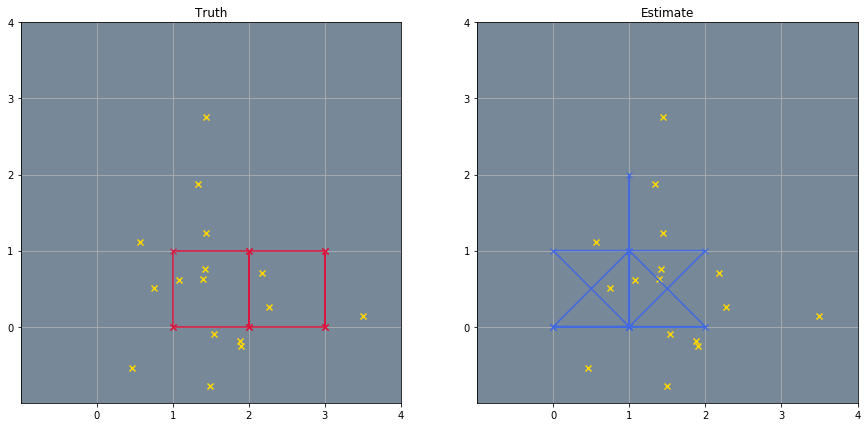

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
for ax in axes:
    ax.set_aspect("equal")
    ax.set_facecolor("lightslategray")
    ax.grid(b=True)
    ax.set_xticks(list(range(10)))
    ax.set_yticks(list(range(10)))
    ax.set_xlim(-1, num)
    ax.set_ylim(-1, num)
    ax.scatter(np.vstack(observations)[:, 0], np.vstack(observations)[:, 1], color="gold", marker="x")
axes[0].plot(np.vstack(true_path)[:, 0], np.vstack(true_path)[:, 1], color="crimson", marker="x")
axes[0].set_title("Truth")
axes[1].plot(np.vstack(most_likely_states)[:, 0], np.vstack(most_likely_states)[:, 1], color="royalblue", marker="x")
axes[1].set_title("Estimate");

In [12]:
N = 10
sims = list(map(simulate_observations, [500]*N))
zs = list(map(lambda x: x[1], sims))

In [13]:
hmm.reestimation(zs, 10)

array([-2202.00452733, -1732.25122653, -1686.56948437, -1664.44422304,
       -1651.55156002, -1643.3931533 , -1637.92828482, -1634.11025245,
       -1631.38059522, -1629.42298934, -1628.0337347 ])

In [15]:
most_likely_states = hmm.decode(observations)

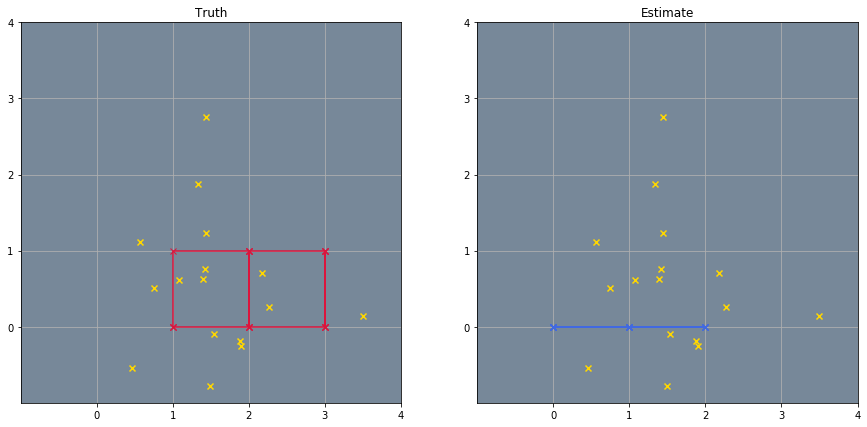

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
for ax in axes:
    ax.set_aspect("equal")
    ax.set_facecolor("lightslategray")
    ax.grid(b=True)
    ax.set_xticks(list(range(10)))
    ax.set_yticks(list(range(10)))
    ax.set_xlim(-1, num)
    ax.set_ylim(-1, num)
    ax.scatter(np.vstack(observations)[:, 0], np.vstack(observations)[:, 1], color="gold", marker="x")
axes[0].plot(np.vstack(true_path)[:, 0], np.vstack(true_path)[:, 1], color="crimson", marker="x")
axes[0].set_title("Truth")
axes[1].plot(np.vstack(most_likely_states)[:, 0], np.vstack(most_likely_states)[:, 1], color="royalblue", marker="x")
axes[1].set_title("Estimate");

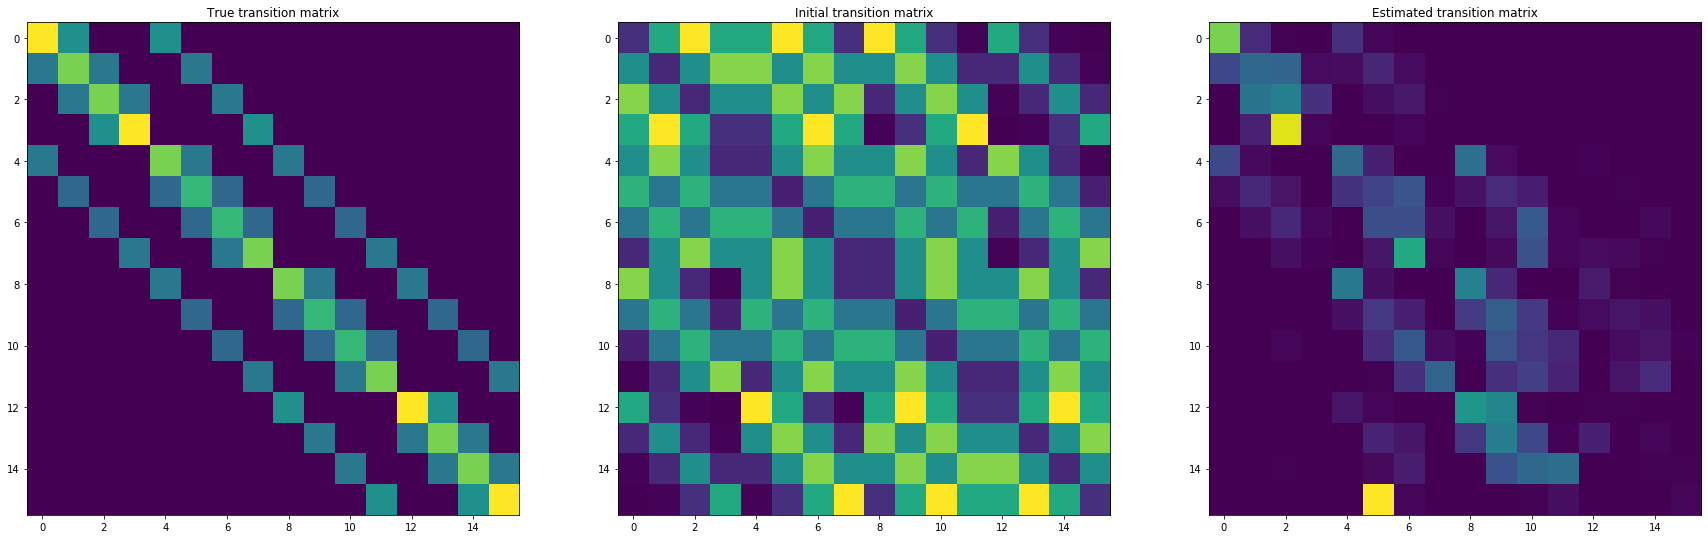

In [17]:
fig, axes = plt.subplots(1,3, figsize=(30, 10))
axes[1].imshow(initial_P)
axes[1].set_title("Initial transition matrix")
axes[0].imshow(true_P)
axes[0].set_title("True transition matrix")
axes[2].imshow(hmm.P)
axes[2].set_title("Estimated transition matrix");

In [18]:
print(f"Initial Frobenius norm: {np.linalg.norm(initial_P - true_P)}")
print(f"Frobenius norm after reestimation: {np.linalg.norm(hmm.P - true_P)}")

Initial Frobenius norm: 2.125548114333301
Frobenius norm after reestimation: 2.0705410928187407


In [19]:
print(f"Initial Frobenius norm: {np.linalg.norm(mu - true_mu)}")
print(f"Frobenius norm after reestimation: {np.linalg.norm(hmm.mu - true_mu)}")

Initial Frobenius norm: 10.583005244258363
Frobenius norm after reestimation: 4.406202903669857


In [20]:
print(f"Initial Frobenius norm: {np.linalg.norm(sigma - true_sigma)}")
print(f"Frobenius norm after reestimation: {np.linalg.norm(hmm.sigma - true_sigma)}")

Initial Frobenius norm: 2.8284271247461903
Frobenius norm after reestimation: 1.2439991498507712
